In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#load the dataset
data = pd.read_csv('troop_movements.csv')

#display first few rows
print("first few rows of the dataframe:")
print(data.head())

first few rows of the dataframe:
             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-07-11 11:51:25        1         at-at               empire   
1  2024-07-11 11:51:24        2  tie_silencer               empire   
2  2024-07-11 11:51:23        3   tie_fighter               empire   
3  2024-07-11 11:51:22        4        x-wing           resistance   
4  2024-07-11 11:51:21        5  stormtrooper               empire   

   location_x  location_y  destination_x  destination_y homeworld  
0           4           1              3              8   Stewjon  
1           2           3              6              3  Mon Cala  
2          10          10              3              3  Iridonia  
3           7          10              2              8    Umbara  
4           5           3              4              7   Iktotch  


In [3]:
#count empire vs resistance
empVsRes = data['empire_or_resistance'].value_counts()
print(empVsRes)

empire_or_resistance
resistance    507
empire        493
Name: count, dtype: int64


In [4]:
#count the homeworlds
homeworlds = data['homeworld'].value_counts()
print(homeworlds)

homeworld
Umbara          32
Quermia         32
Vulpter         32
Socorro         31
Toydaria        30
Malastare       30
Concord Dawn    30
Tholoth         29
Iktotch         29
Corellia        29
Mirial          29
Skako           29
Iridonia        27
Dorin           27
Serenno         27
Dagobah         26
Stewjon         26
Bestine IV      25
Kalee           25
Glee Anselm     24
Chandrila       24
Aleen Minor     24
Dathomir        24
Ryloth          22
Kashyyyk        22
Alderaan        22
Rodia           21
Ojom            21
Sullust         21
Troiken         21
Eriadu          20
Haruun Kal      20
Muunilinst      20
Naboo           19
Trandosha       19
Zolan           18
Champala        18
Tatooine        17
Cerea           16
Mon Cala        16
Shili           15
Tund            11
Name: count, dtype: int64


In [5]:
#count unit type
units = data['unit_type'].value_counts()
print(units)

unit_type
at-at                 145
unknown               140
stormtrooper          127
at-st                 127
tie_fighter           122
tie_silencer          121
x-wing                121
resistance_soldier     97
Name: count, dtype: int64


In [6]:
#create new column is resistance
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
print(data.head())

             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-07-11 11:51:25        1         at-at               empire   
1  2024-07-11 11:51:24        2  tie_silencer               empire   
2  2024-07-11 11:51:23        3   tie_fighter               empire   
3  2024-07-11 11:51:22        4        x-wing           resistance   
4  2024-07-11 11:51:21        5  stormtrooper               empire   

   location_x  location_y  destination_x  destination_y homeworld  \
0           4           1              3              8   Stewjon   
1           2           3              6              3  Mon Cala   
2          10          10              3              3  Iridonia   
3           7          10              2              8    Umbara   
4           5           3              4              7   Iktotch   

   is_resistance  
0          False  
1          False  
2          False  
3           True  
4          False  


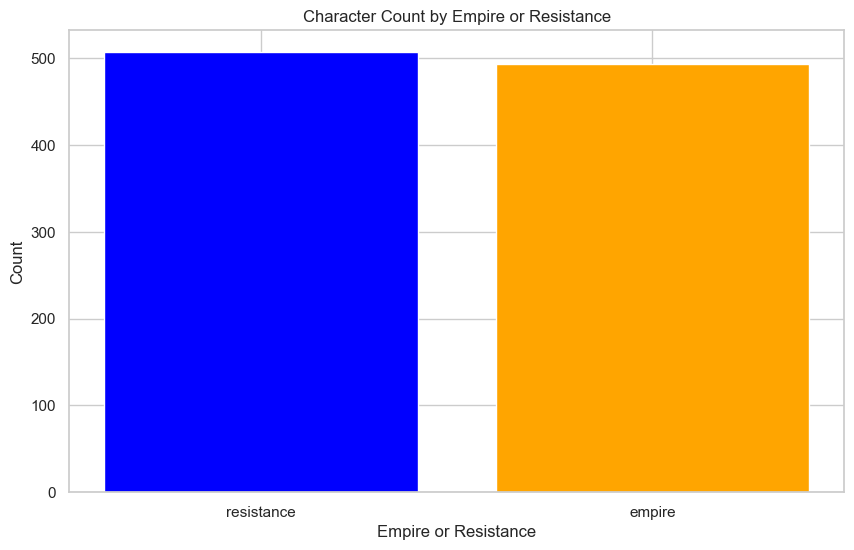

In [7]:
#set up seaborn
sns.set_theme(style="whitegrid")


#create bar plot
plt.figure(figsize=(10,6))
plt.bar(x=empVsRes.index, height=empVsRes.values, color=['blue', 'orange'])
plt.ylabel('Count')
plt.xlabel('Empire or Resistance')
plt.title("Character Count by Empire or Resistance")
plt.show()

In [10]:
data.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-11 11:51:25,1,at-at,empire,4,1,3,8,Stewjon,False
1,2024-07-11 11:51:24,2,tie_silencer,empire,2,3,6,3,Mon Cala,False
2,2024-07-11 11:51:23,3,tie_fighter,empire,10,10,3,3,Iridonia,False
3,2024-07-11 11:51:22,4,x-wing,resistance,7,10,2,8,Umbara,True
4,2024-07-11 11:51:21,5,stormtrooper,empire,5,3,4,7,Iktotch,False


In [12]:
# Get feature importances 
columns_to_encode = ['unit_type', 'homeworld']

df_encoded = pd.get_dummies(data[columns_to_encode], prefix=columns_to_encode)

data = pd.concat([data, df_encoded.astype(int)], axis=1)

data = data.drop(columns=columns_to_encode)

,timestamp,unit_id,empire_or_resistance,location_x,location_y,destination_x,destination_y,is_resistance,unit_type_at-at,unit_type_at-st,...,homeworld_Sullust,homeworld_Tatooine,homeworld_Tholoth,homeworld_Toydaria,homeworld_Trandosha,homeworld_Troiken,homeworld_Tund,homeworld_Umbara,homeworld_Vulpter,homeworld_Zolan
0,2024-07-11 11:51:25,1,empire,4,1,3,8,False,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-07-11 11:51:24,2,empire,2,3,6,3,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-07-11 11:51:23,3,empire,10,10,3,3,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-07-11 11:51:22,4,resistance,7,10,2,8,True,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2024-07-11 11:51:21,5,empire,5,3,4,7,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = pd.concat([data.iloc[:, 8:]], axis=1)
y = data['is_resistance']

In [17]:
# split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Decision Tree Classifier
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.565


Text(0.5, 1.0, 'Top 10 Feature Importances')

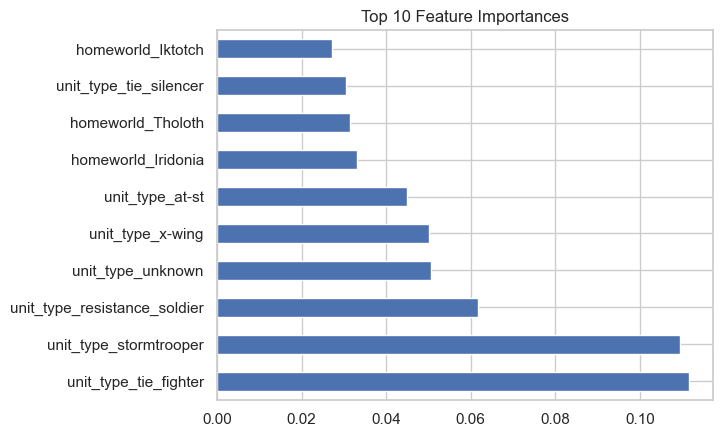

In [35]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')

In [20]:
import pickle

# Specify the file path to save the pipeline
file_path = 'starwars_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(model, file)
    file.close()